In [8]:
# 数据预处理
import csv
import numpy as np
# 从指定的文件中提取训练集和测试集
'''file path 是指定的文件路径，rate 是划分训练集的占比，is_shuffle是否要打乱'''
'''这个函数返回四个参数，他们都是ndarray类型的'''
def getDataset(filepath, rate, is_shuffle=True):
    with open(filepath) as file_obj:
        reader = csv.reader(file_obj)
        X = list(reader)
        X.pop(0)    # 把表头去掉

    Y = []
    for line in X:
        Y.append(line.pop(-1))

    # 先将列表转化为numpy数组
    data = np.array(X).astype('float32')
    labels = np.array(Y).astype('int64')

    idx = [value for value in range(len(X))]    # 生成一个从0~len(X)-1的序列
    if is_shuffle:
        np.random.shuffle(idx)  # 打乱顺序
    data = data[idx]
    labels = labels[idx]

    # 分割训练集与测试集
    separated_line = int(rate*len(X))
    x_train = data[:separated_line]
    y_train = labels[:separated_line]
    x_test = data[separated_line:]
    y_test = labels[separated_line:]

    return x_train, y_train,x_test,y_test

In [9]:
x_train, y_train,x_test,y_test = getDataset('./chapter3_knn/diabetes.csv',0.6)


In [10]:
print(x_train.shape)
print(y_train.shape)
print(x_test)
print(y_test)


(460, 8)
(460,)
[[  0.    127.     80.    ...  36.3     0.804  23.   ]
 [  7.    181.     84.    ...  35.9     0.586  51.   ]
 [  9.    156.     86.    ...  34.3     1.189  42.   ]
 ...
 [  2.    101.     58.    ...  24.2     0.614  23.   ]
 [  8.    100.     74.    ...  39.4     0.661  43.   ]
 [  1.    106.     76.    ...  37.5     0.197  26.   ]]
[0 1 1 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1
 0 0 0 0 1 1 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0 1 1 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1
 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 1 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1
 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0
 0 1 0 0 1 1 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0
 0 0 0 1 0 0 0 0 1 0 1 0]


In [11]:
# 创建模型
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

def train_model(K = 3):
    clf = KNeighborsClassifier(n_neighbors=K)
    clf.fit(x_train,y_train)
    test_prediction = clf.predict(x_test)
    train_prediction = clf.predict(x_train)
    return accuracy_score(y_test, test_prediction), precision_score(y_test, test_prediction), precision_score(y_train, train_prediction)

In [12]:
k_axis = []
test_precision_axis = []
train_precision_axis = []
accuracy_axis = []
for k in range(1,101):
    k_axis.append(k)
    accuracy, test_precision, train_precision = train_model(k)
    test_precision_axis.append(test_precision)
    train_precision_axis.append(train_precision)
    accuracy_axis.append(accuracy)

In [13]:
from matplotlib import pyplot as plt

def plot(x,y, xlabel, ylabel, title):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.plot(x,y)
    plt.show()
    print('the highest {} is {}, and corresponding k is {}'.format(ylabel,max(y),np.argmax(y)))

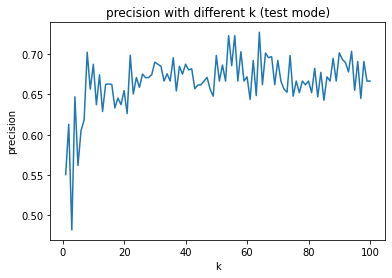

the highest precision is 0.7272727272727273, and corresponding k is 63


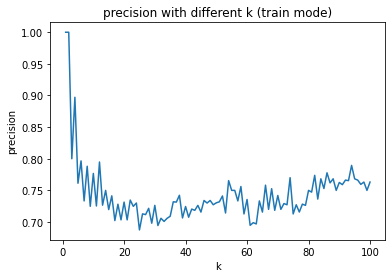

the highest precision is 1.0, and corresponding k is 0


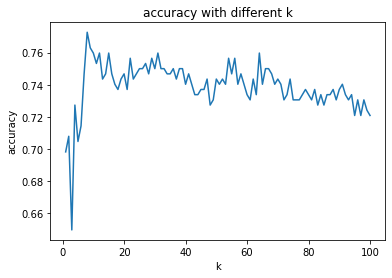

the highest accuracy is 0.7727272727272727, and corresponding k is 7


In [14]:
plot(k_axis,test_precision_axis,'k','precision','precision with different k (test mode)')
plot(k_axis,train_precision_axis,'k','precision','precision with different k (train mode)')
plot(k_axis,accuracy_axis,'k','accuracy','accuracy with different k')


